# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-10-14 23:59:59--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-10-15 00:00:00--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

     Country  Quantity  UnitPrice
0  Australia     83653   3.220612
1    Austria      4827   4.243192
2    Bahrain       260   4.556316
3    Belgium     23152   3.644335
4     Brazil       356   4.456250


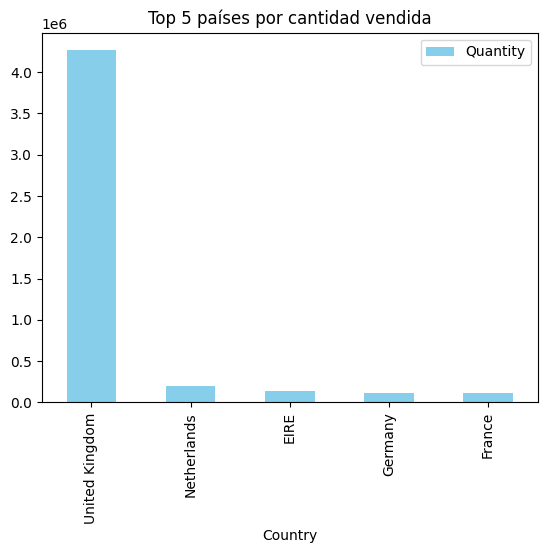

In [13]:

por_pais = data.groupby("Country").agg({"Quantity":"sum","UnitPrice":"mean"}).reset_index()
print(por_pais.head())
por_pais.nlargest(5,"Quantity").plot.bar(x="Country",y="Quantity",color="skyblue")
plt.title("Top 5 países por cantidad vendida")
plt.show()


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64


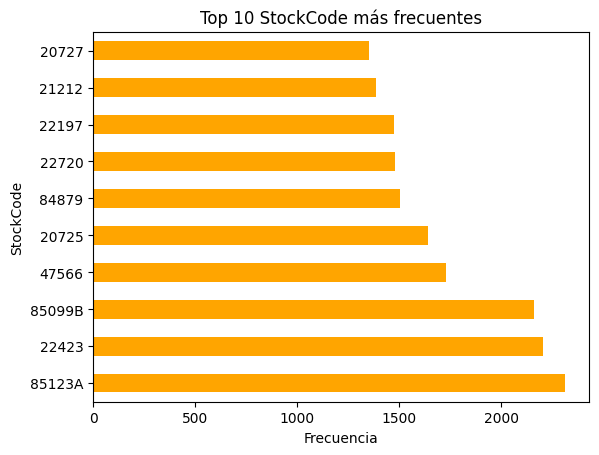

In [14]:
freq = data["StockCode"].value_counts().head(10)
print(freq)
freq.plot.barh(color="orange")
plt.title("Top 10 StockCode más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("StockCode")
plt.show()


## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

Factura promedio: 376.3609240926641


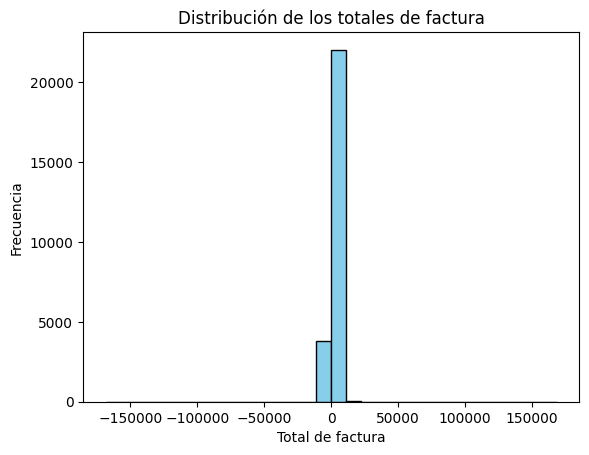

In [15]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]
facturas = data.groupby("InvoiceNo")["TotalPrice"].sum()
print("Factura promedio:", facturas.mean())
facturas.plot(kind="hist", bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución de los totales de factura")
plt.xlabel("Total de factura")
plt.ylabel("Frecuencia")
plt.show()


## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

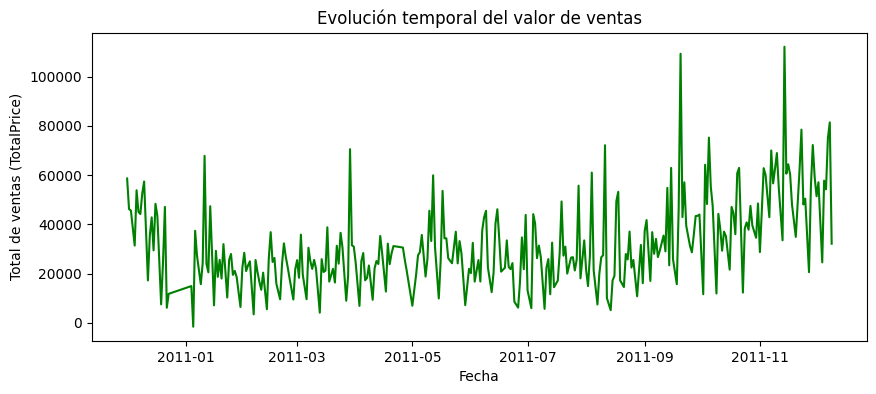

In [16]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
ventas_tiempo = data.groupby(data["InvoiceDate"].dt.date)["TotalPrice"].sum()
ventas_tiempo.plot(figsize=(10,4), color="green")
plt.title("Evolución temporal del valor de ventas")
plt.xlabel("Fecha")
plt.ylabel("Total de ventas (TotalPrice)")
plt.show()


## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

/tmp/ipython-input-843648046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y="UnitPrice", data=sub6, palette="Set2", fliersize=3, boxprops={"linewidth":0.9}, showfliers=True)


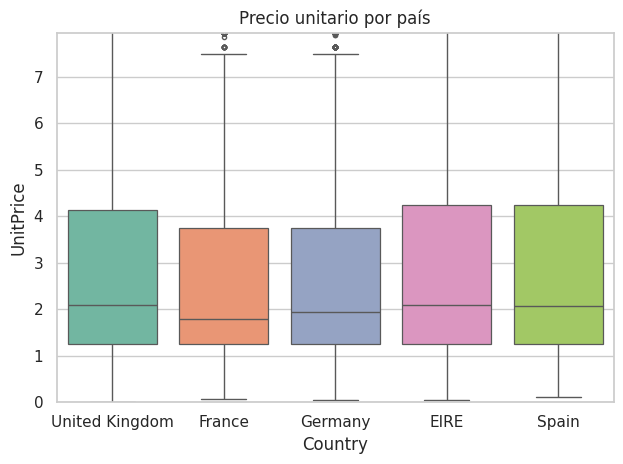

In [32]:
sns.set(style="whitegrid")
top = data["Country"].value_counts().nlargest(5).index
sub6 = data.loc[data["Country"].isin(top) & (data["UnitPrice"]>0)]
sns.boxplot(x="Country", y="UnitPrice", data=sub6, palette="Set2", fliersize=3, boxprops={"linewidth":0.9}, showfliers=True)
plt.ylim(0, sub6["UnitPrice"].quantile(0.9))
plt.title("Precio unitario por país")
plt.tight_layout()
plt.show()


## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

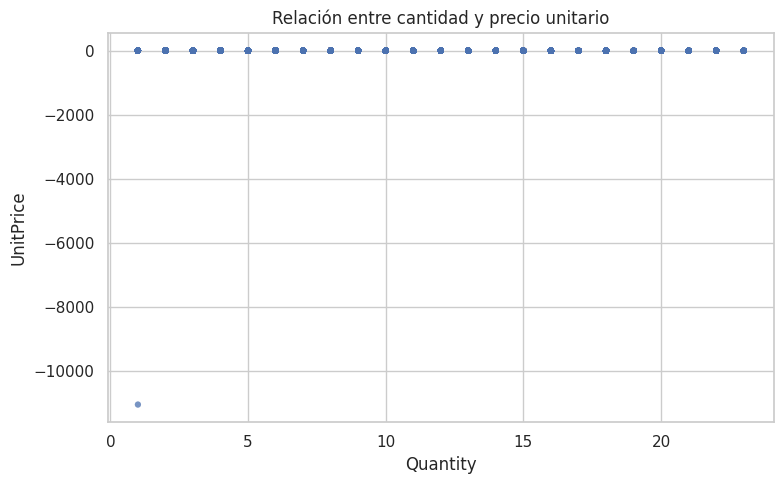

In [33]:
sns.set(style="whitegrid")
sub7 = data.query("Quantity>0 and Quantity<@data.Quantity.quantile(0.9) and UnitPrice<@data.UnitPrice.quantile(0.9)")
plt.figure(figsize=(8,5))
plt.scatter(sub7["Quantity"], sub7["UnitPrice"], s=20, alpha=0.5, edgecolors="none")  # edgecolors="none" evita la advertencia
plt.title("Relación entre cantidad y precio unitario")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.tight_layout()
plt.show()





## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

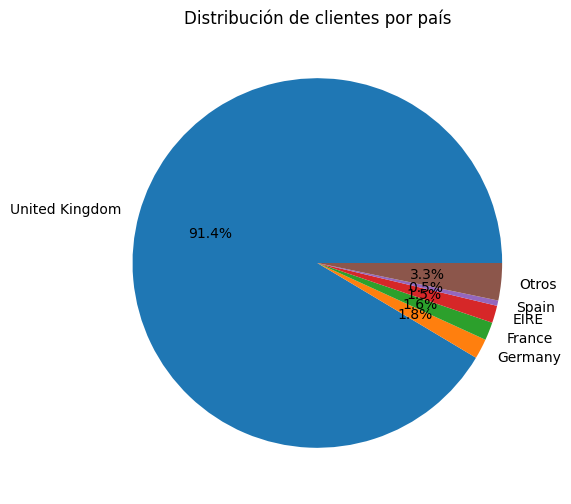

In [21]:
clientes_pais = data["Country"].value_counts()
clientes_top = clientes_pais.head(5)
clientes_top["Otros"] = clientes_pais[5:].sum()
clientes_top.plot.pie(autopct="%1.1f%%", figsize=(6,6), ylabel="")
plt.title("Distribución de clientes por país")
plt.show()




## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

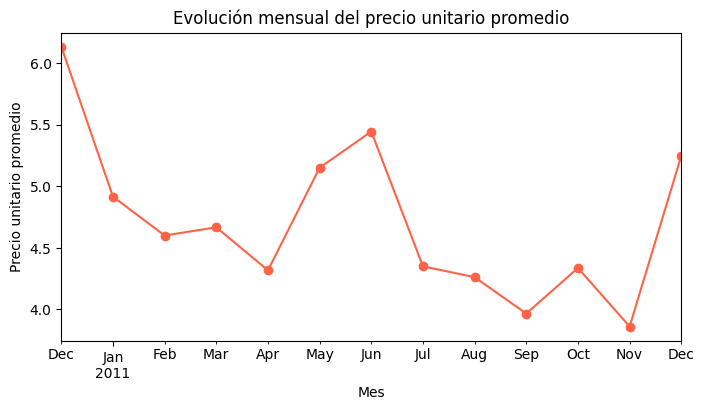

In [22]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
precio_mensual = data.groupby(data["InvoiceDate"].dt.to_period("M"))["UnitPrice"].mean()
precio_mensual.plot(kind="line", marker="o", color="tomato", figsize=(8,4))
plt.title("Evolución mensual del precio unitario promedio")
plt.xlabel("Mes")
plt.ylabel("Precio unitario promedio")
plt.show()


## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: count, dtype: int64


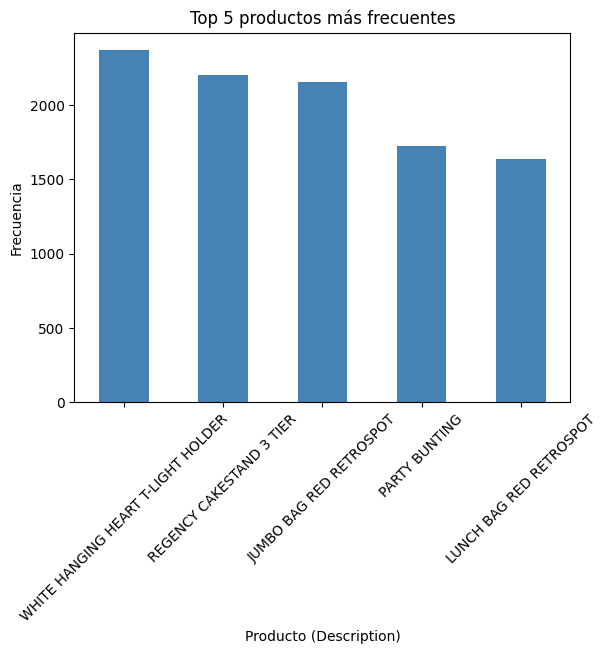

In [24]:
productos_freq = data["Description"].value_counts().head(5)
print(productos_freq)
productos_freq.plot(kind="bar", color="steelblue")
plt.title("Top 5 productos más frecuentes")
plt.xlabel("Producto (Description)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.

**Frecuencia de productos (StockCode):**
Se identificó que un grupo reducido de productos concentra la mayor cantidad de transacciones. Esto indica que el negocio depende en gran medida de ciertos artículos “estrella”, lo cual puede ser una oportunidad para reforzar inventario o campañas promocionales.

**Ventas totales por factura:**
Al calcular el valor total por factura, se observó que la mayoría de las compras son de bajo valor, mientras que existen pocas facturas con montos muy altos. Esto sugiere un comportamiento típico de ventas minoristas, con transacciones frecuentes pero de pequeño importe.

**Evolución temporal de las ventas:**
El gráfico de líneas mostró fluctuaciones a lo largo del tiempo, con algunos picos marcados en determinadas fechas. Estos picos pueden asociarse a temporadas altas, promociones o eventos específicos. La tendencia general demuestra que las ventas no son constantes, sino estacionales.

**Distribución de precios por país (boxplot):**
Los boxplots revelaron una gran dispersión en los precios unitarios según el país. Algunos mercados presentan valores atípicos muy altos, posiblemente relacionados con productos exclusivos o diferencias en el tipo de cambio o costos de envío.

**Relación entre cantidad y precio unitario (scatter plot):**
No se encontró una correlación clara entre la cantidad comprada y el precio unitario. Esto sugiere que los descuentos por volumen no son una práctica predominante, o que los clientes compran cantidades variables independientemente del precio.

**Distribución de clientes por país (gráfico de pastel):**
La mayoría de las ventas provienen de un pequeño grupo de países, mientras que otros aportan porcentajes mínimos. Esto refleja una concentración geográfica del mercado y la necesidad de diversificar o fortalecer la presencia en regiones con baja participación.

**Evolución del precio unitario promedio (mensual):**
El promedio mensual del precio unitario mostró variaciones moderadas a lo largo del tiempo. No se detecta una inflación constante, sino cambios puntuales posiblemente relacionados con la disponibilidad de productos o fluctuaciones en costos logísticos.

**Productos más vendidos (por descripción):**
Los cinco productos con mayor frecuencia de venta son artículos de alta rotación, generalmente relacionados con regalos o decoración. Estos resultados son útiles para priorizar el control de inventario y estrategias de marketing.

**Patrones generales del dataset:**
En conjunto, los datos reflejan una estructura de ventas estable pero concentrada: pocos productos y países dominan la mayor parte del volumen. Sin embargo, la dispersión en precios y la variabilidad temporal muestran oportunidades de optimización en precios y distribución.

**Conclusión general:**
El análisis evidencia la importancia de una gestión de datos continua para entender el comportamiento de los clientes y las tendencias de venta. Visualizaciones como las usadas en este estudio permiten detectar patrones clave y tomar decisiones más informadas sobre inventario, precios y mercados prioritarios.